In [ ]:
!pip install plotly

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [ ]:
ds = pd.read_csv('sample_data/mall.csv')

In [ ]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
ds.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X= ds.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
plt.style.use('fivethirtyeight')

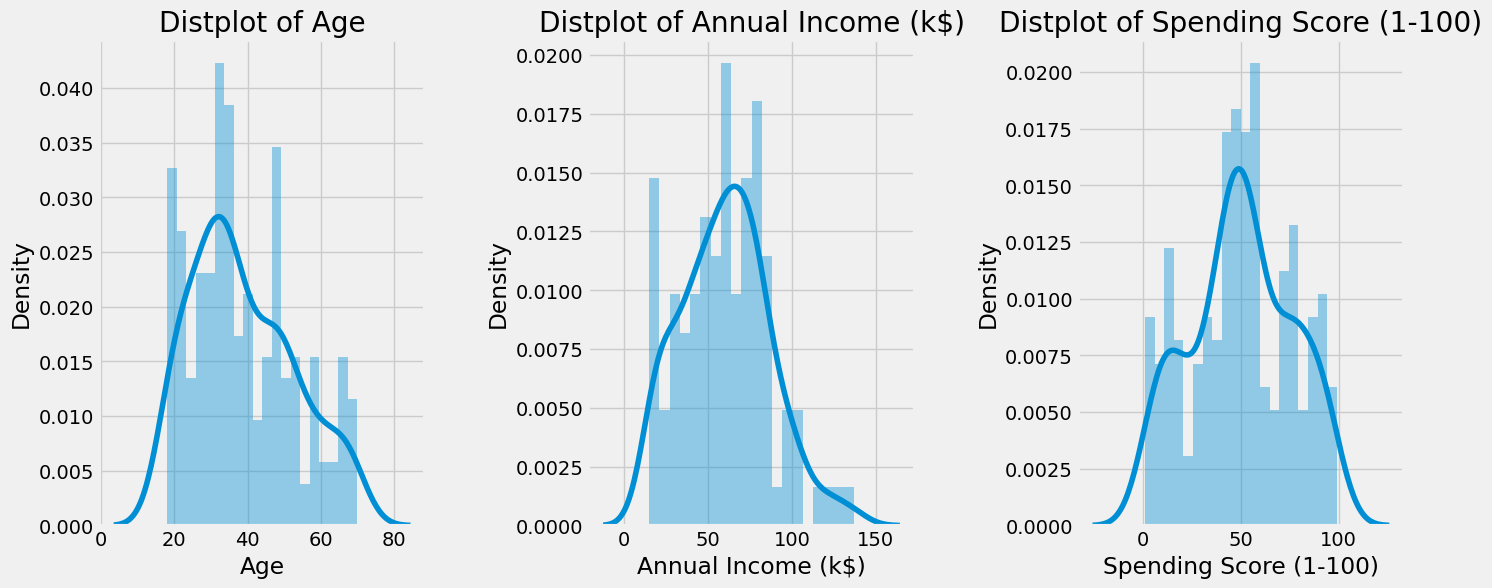

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(ds[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()



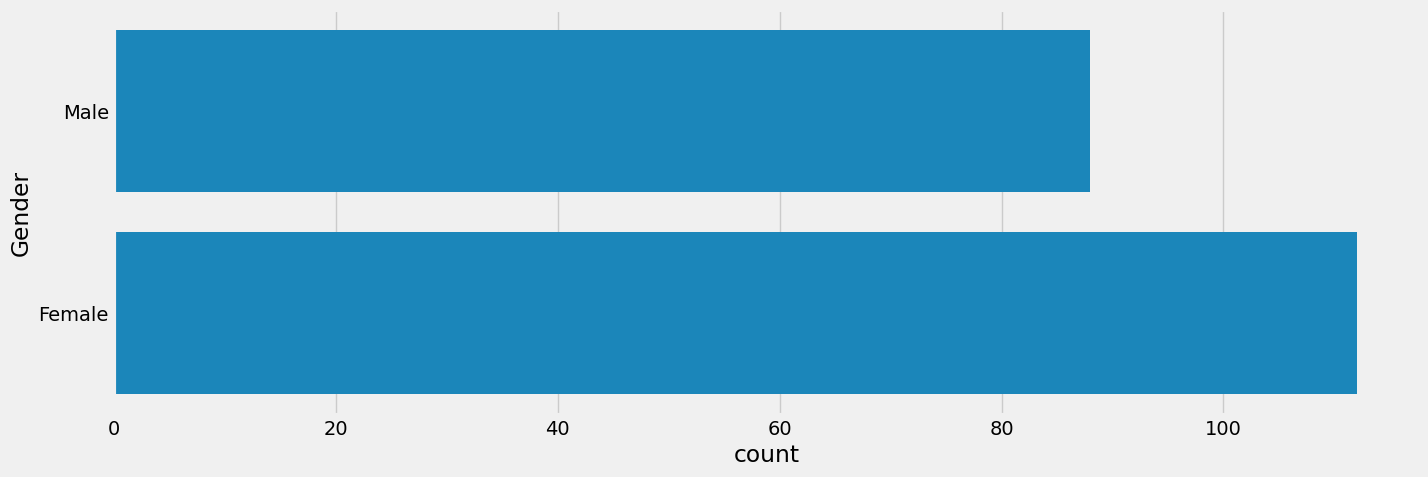

In [ ]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Gender', data=ds)
plt.show()

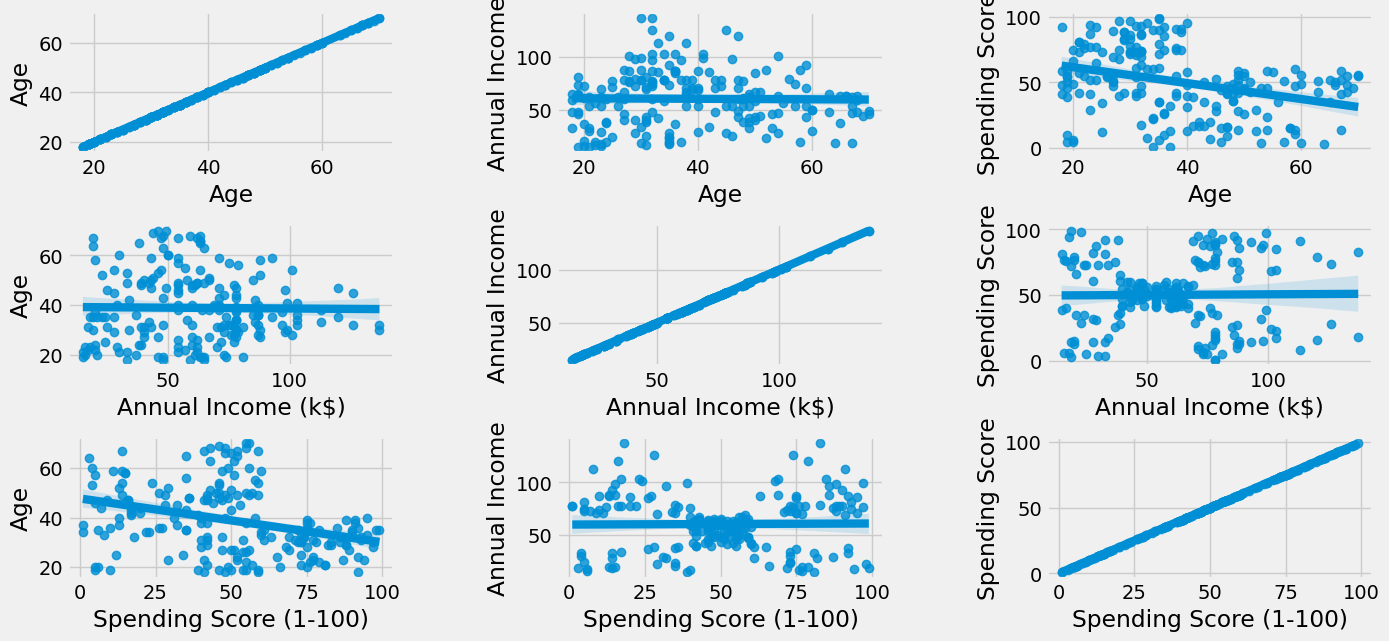

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = ds)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

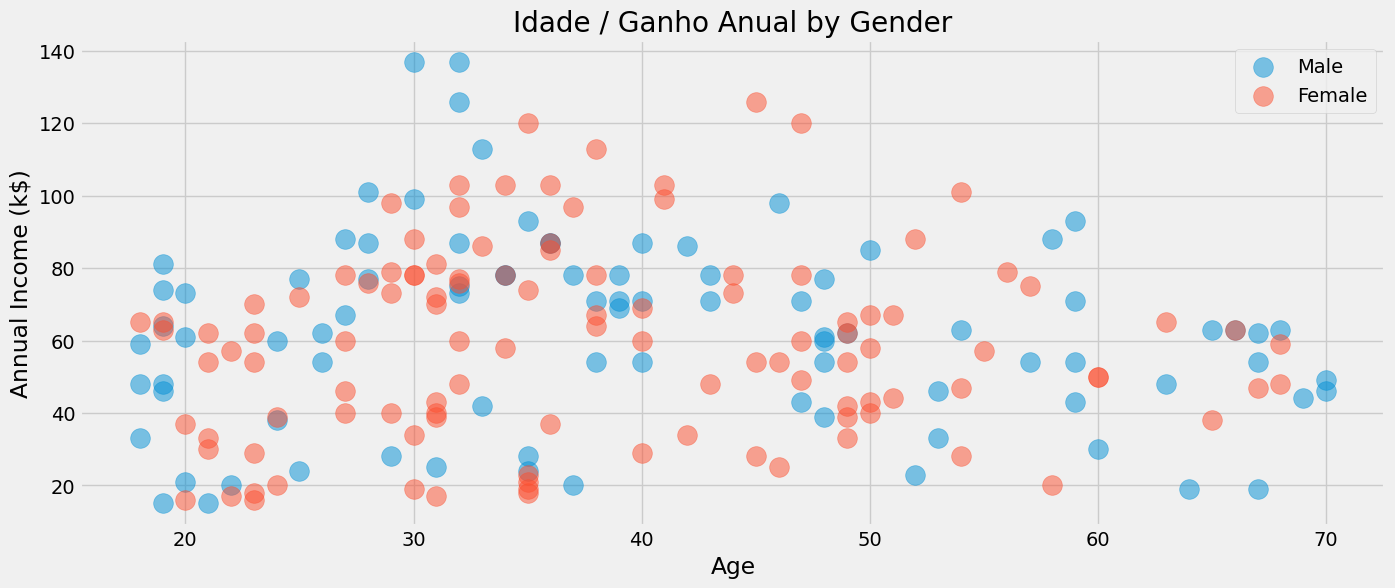

In [ ]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = ds[ds['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
  plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
  plt.title("Idade / Ganho Anual by Gender")
plt.legend()
plt.show()


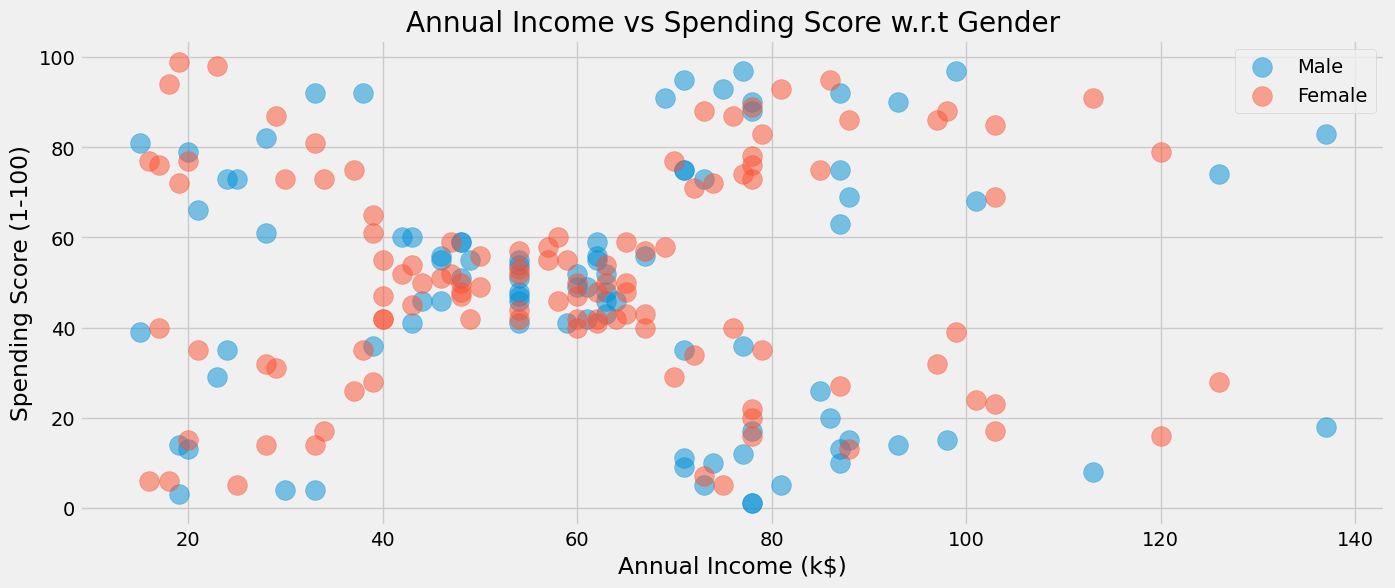

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = ds[ds['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

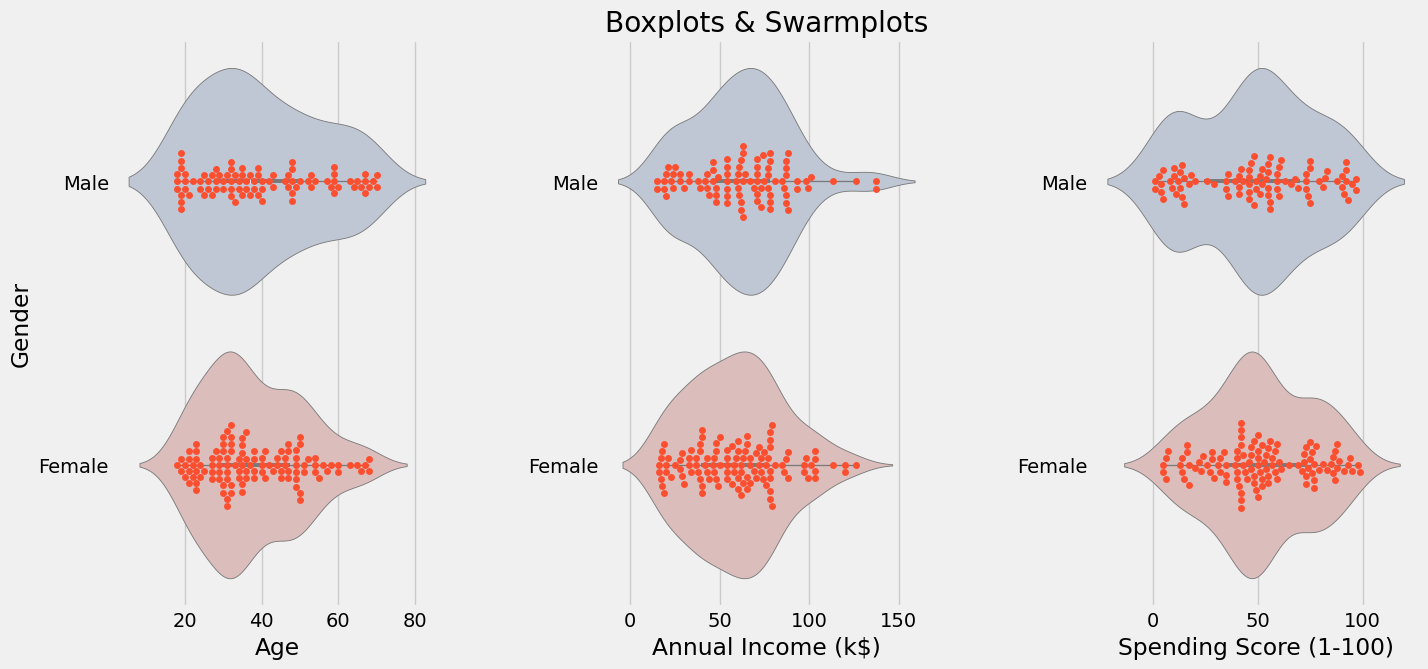

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = ds , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = ds)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [ ]:
X1 = ds[['Age', 'Spending Score (1-100)' ]].iloc[:,:].values
inercias = []
valores_k = []
for n in range(1,15):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X1)
  valores_k.append(n)
  inercias.append(kmeans.inertia_)


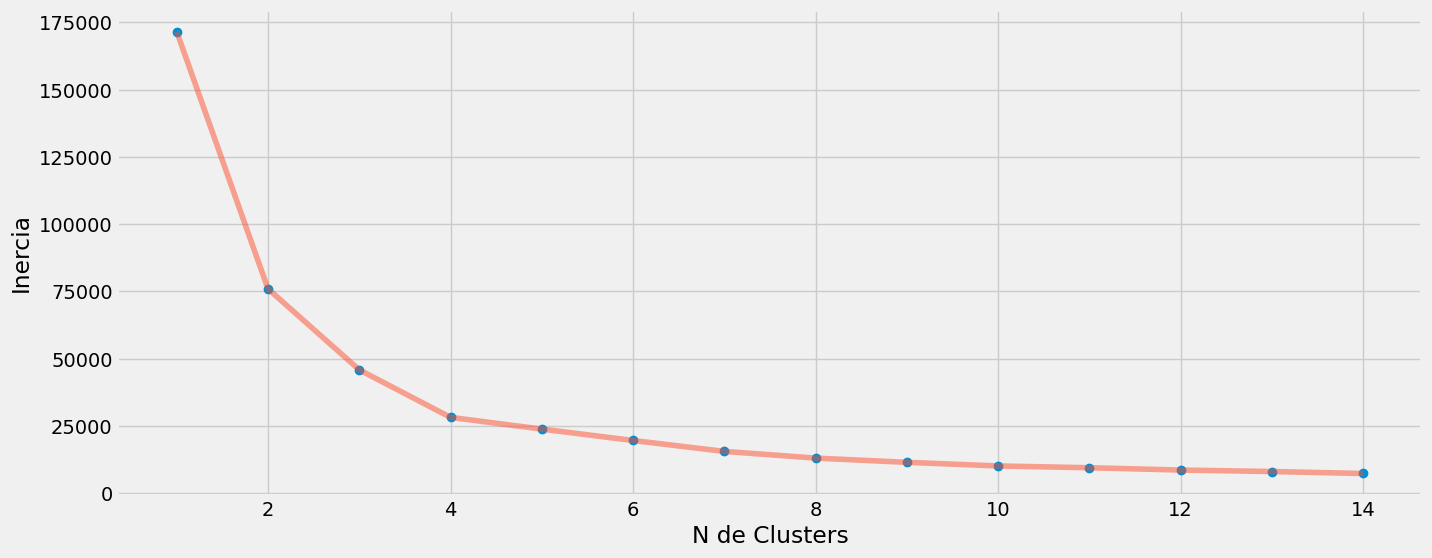

In [ ]:
plt.figure(1, figsize=(15,6))
plt.plot(valores_k, inercias,'o')
plt.plot(valores_k, inercias,'-', alpha=0.5)
plt.xlabel('N de Clusters'), plt.ylabel("Inercia")
plt.show()

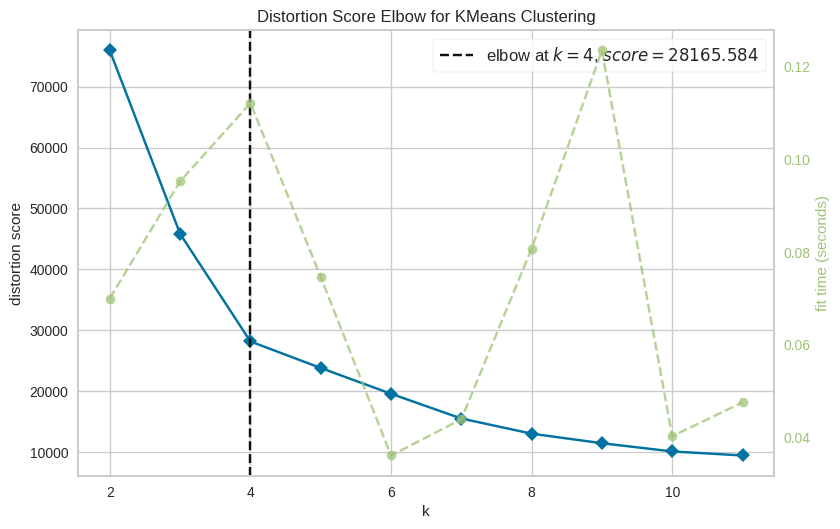

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=11, random_state=0)
visualizer = KElbowVisualizer(model,k=11)
visualizer.fit(X1)
visualizer.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X1)
centroids1 = kmeans3.cluster_centers_



In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans3.predict(np.c_[xx.ravel(), yy.ravel()])

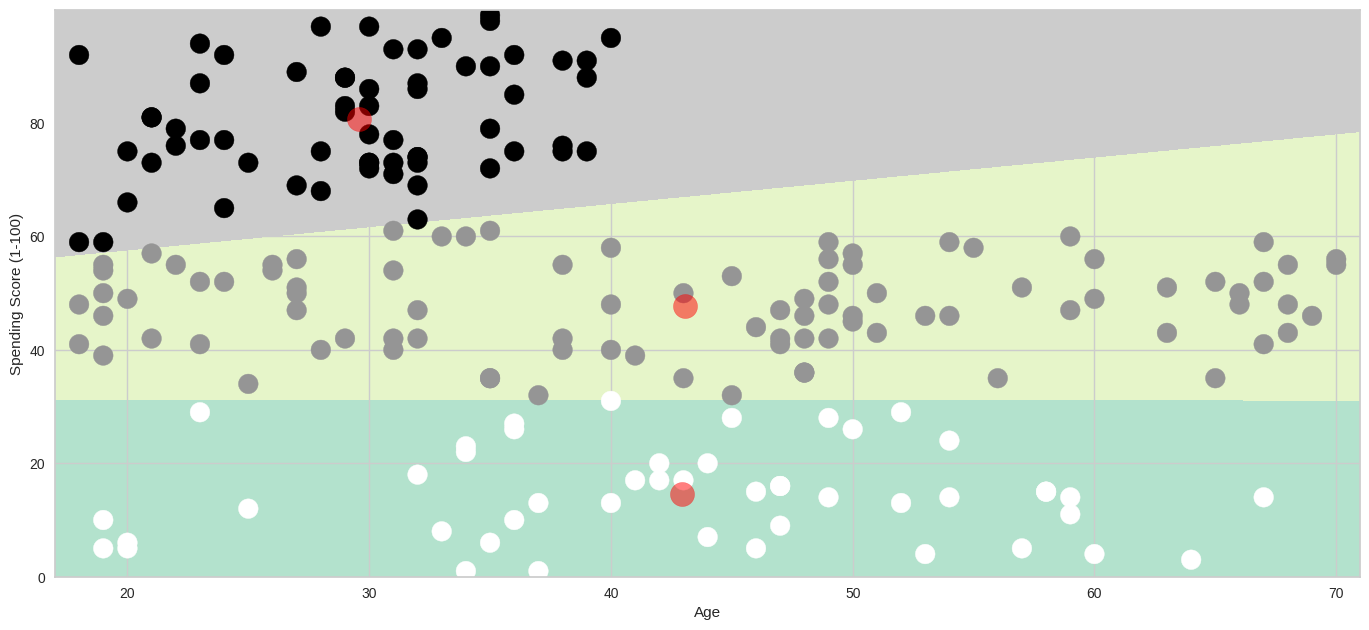

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = ds , c = kmeans3.labels_ ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X1)
centroids2 = kmeans4.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans4.predict(np.c_[xx.ravel(), yy.ravel()])

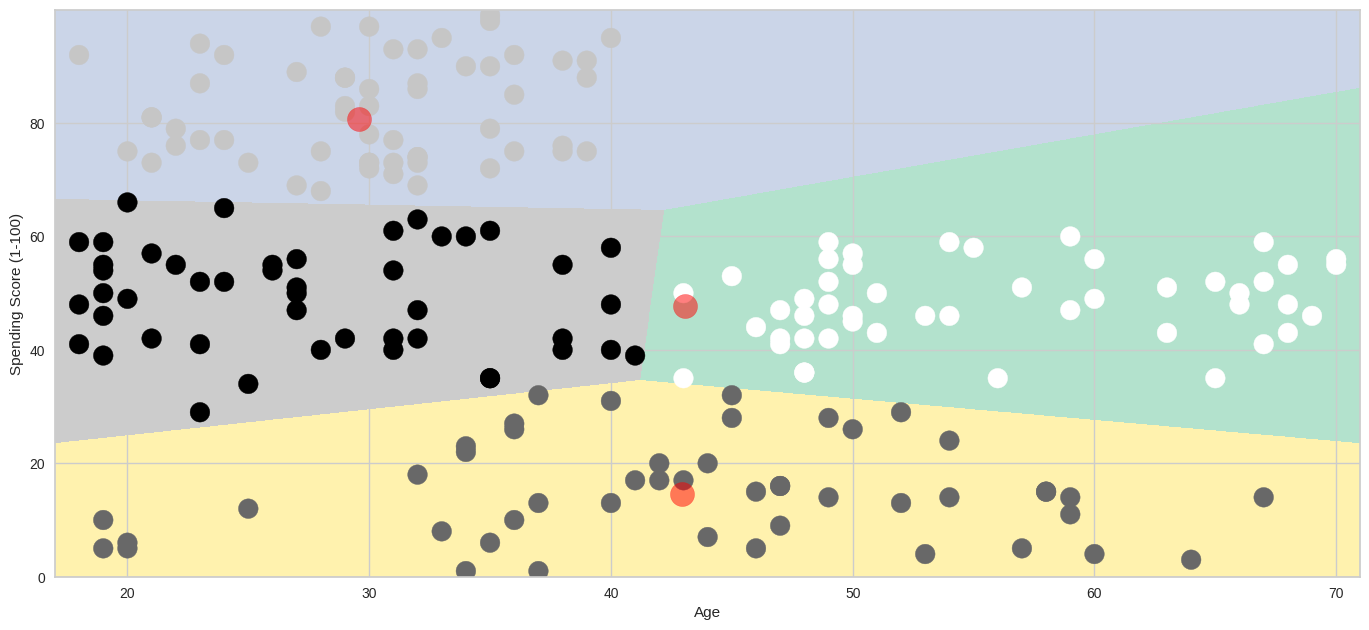

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = ds , c = kmeans4.labels_ ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
X2 = ds[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inercias = []
valores_k = []
for n in range(1,15):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X2)
  valores_k.append(n)
  inercias.append(kmeans.inertia_)


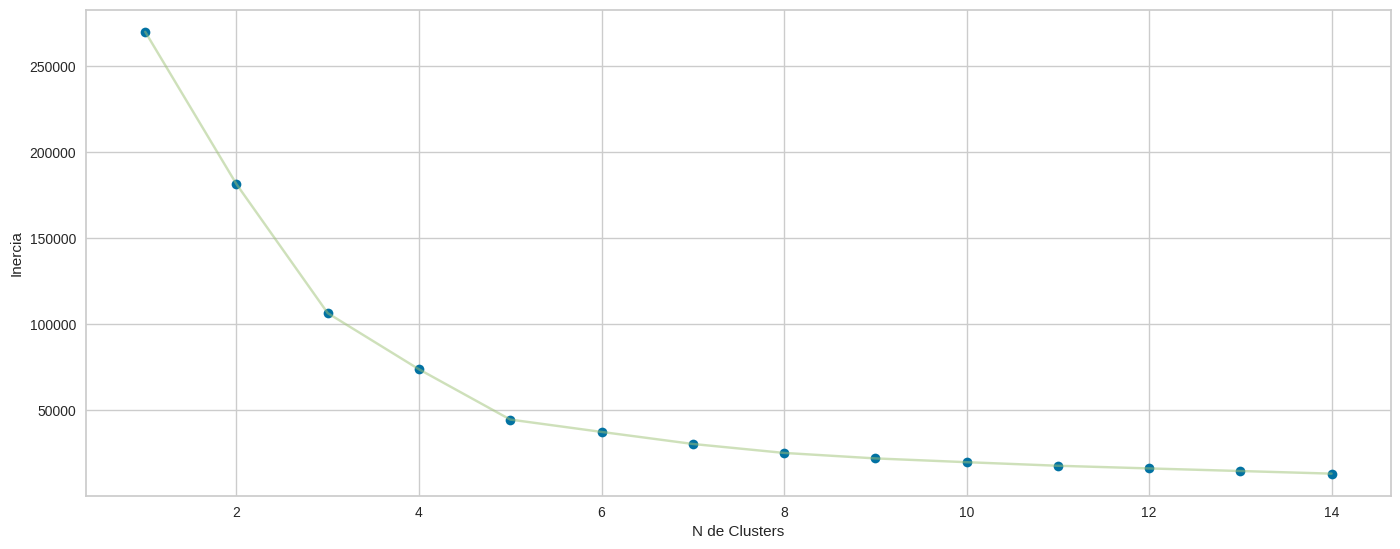

In [ ]:
plt.figure(1, figsize=(15,6))
plt.plot(valores_k, inercias,'o')
plt.plot(valores_k, inercias,'-', alpha=0.5)
plt.xlabel('N de Clusters'), plt.ylabel("Inercia")
plt.show()

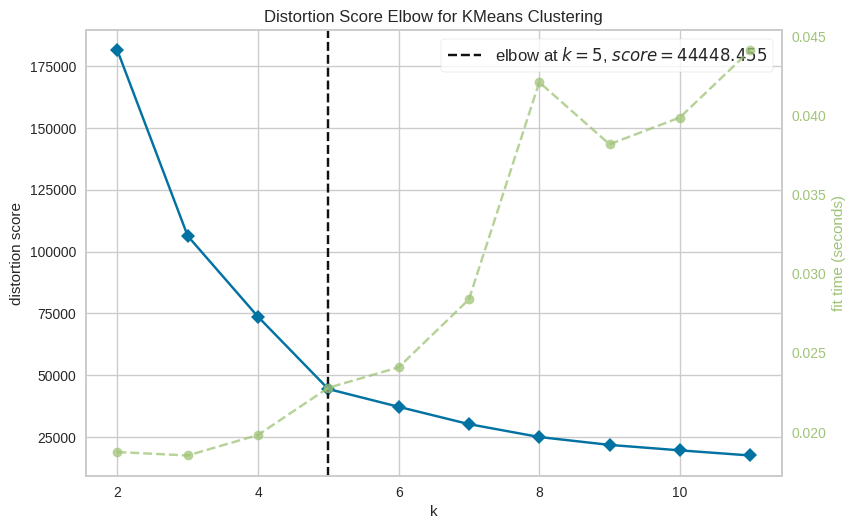

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=11, random_state=0)
visualizer = KElbowVisualizer(model,k=11)
visualizer.fit(X2)
visualizer.show()

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X2)
centroids3 = kmeans5.cluster_centers_


In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = kmeans5.predict(np.c_[xx.ravel(), yy.ravel()])

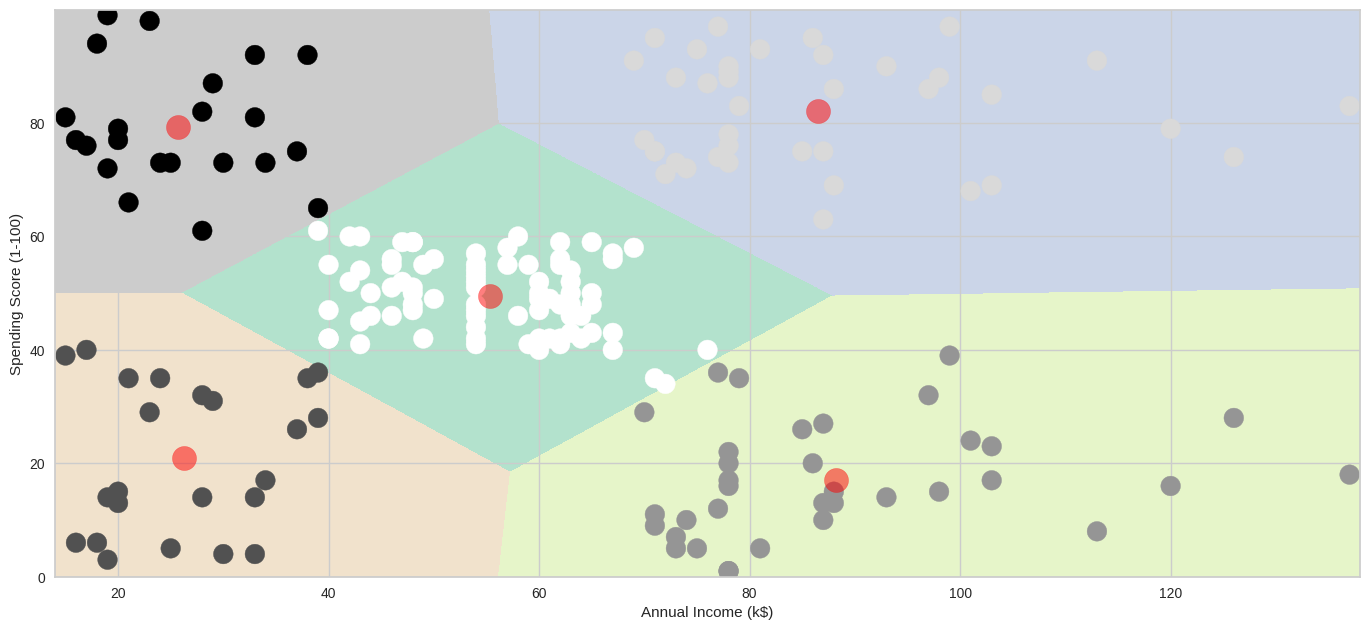

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = ds , c = kmeans5.labels_ ,
            s = 200 )
plt.scatter(x = centroids3[: , 0] , y =  centroids3[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [ ]:
X3 = ds[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inercias = []
valores_k = []
for n in range(1,15):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X3)
  valores_k.append(n)
  inercias.append(kmeans.inertia_)

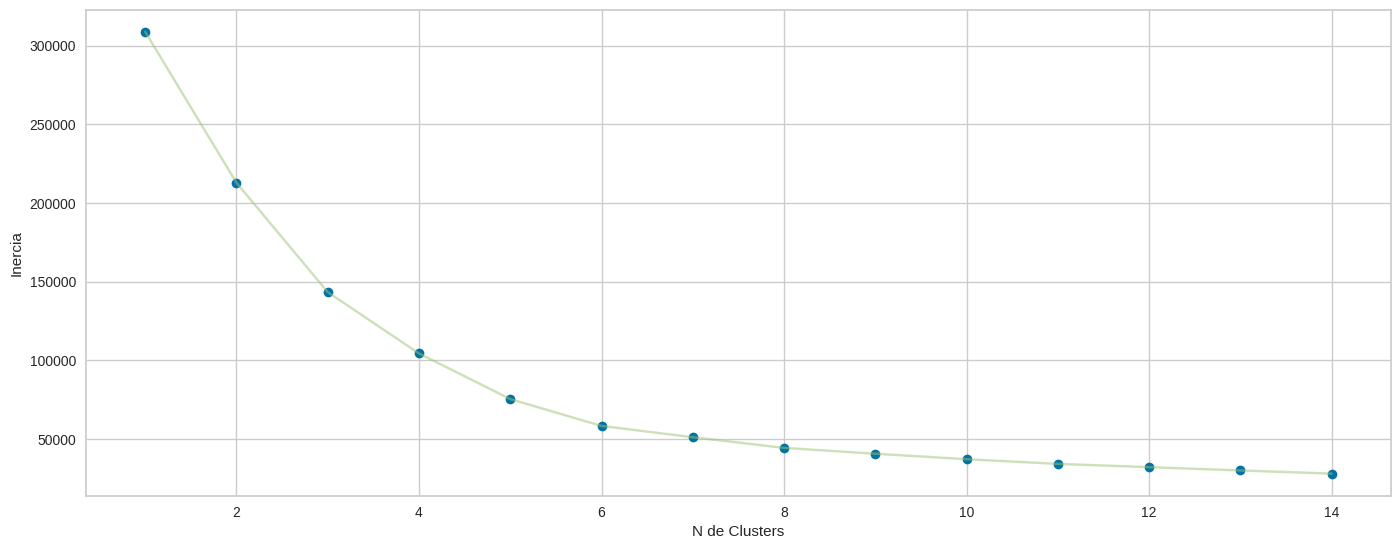

In [ ]:
plt.figure(1, figsize=(15,6))
plt.plot(valores_k, inercias,'o')
plt.plot(valores_k, inercias,'-', alpha=0.5)
plt.xlabel('N de Clusters'), plt.ylabel("Inercia")
plt.show()

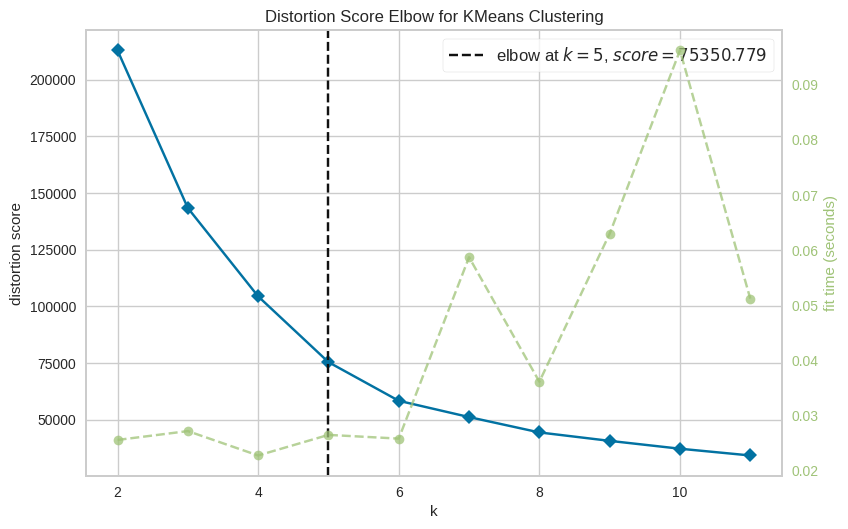

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=11, random_state=0)
visualizer = KElbowVisualizer(model,k=11)
visualizer.fit(X3)
visualizer.show()

In [ ]:
kmeans5_3d = KMeans(n_clusters=5, random_state=0).fit(X3)
centroids3 = kmeans5_3d.cluster_centers_
labels3 = kmeans5_3d.labels_

In [ ]:
%matplotlib inline
import plotly.io as pio


In [ ]:
ds['label3'] =  labels3
trace1 = go.Scatter3d(
    x= ds['Age'],
    y= ds['Spending Score (1-100)'],
    z= ds['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = ds['label3'],
        size= 20,
        line=dict(
            color= ds['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(

    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
from sklearn import metrics


In [ ]:
X4 = ds[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inercias = []
valores_k = []
s = []
for n in range(2,15):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(X3)
  valores_k.append(n)
  inercias.append(kmeans.inertia_)
  s.append(metrics.silhouette_score(X4, kmeans.labels_))

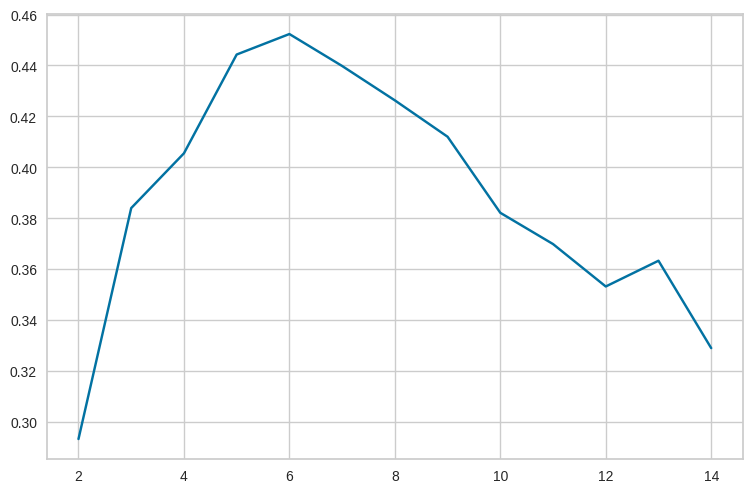

In [ ]:
fig, ax = plt.subplots()
ax.plot(valores_k, s)
plt.show()
